In [2]:
import pandas as pd
import numpy as np
import torch

In [3]:
default_aa_keys='-GALMFWKQESPVICYHRNDT'
def fasta_to_df(fasta_file, aa_keys = default_aa_keys):
    """
    creates one hot encoding of a fasta file using biopython's alignio.read process. 
    fasta_file : filepath leading to msa file in fasta format at hand
    """
    column_names = []
    column_names.extend(aa_keys)
    msa=AlignIO.read(fasta_file, "fasta")
    num_columns = len(msa[0].seq)
    column_names = column_names*num_columns
    column_names.append('sequence')
    column_names.append('id')
    init = np.zeros((len(msa), len(column_names)))
    df = pd.DataFrame(init, columns = column_names)
    df.sequence = df.sequence.astype(str)
    df.id=df.id.astype(str)
    
    for row_num, alignment in tqdm(enumerate(msa)):
        sequence = str(alignment.seq)
        for index, char in enumerate(sequence):
            place = aa_keys.find(char)
            df.iloc[row_num, index*len(aa_keys) + place] = 1
        
        df.iloc[row_num,-2]=str(alignment.seq)
        df.iloc[row_num,-1]=str(alignment.id)
    
    return df

In [4]:
def create_frequency_matrix(df, aa_keys = default_aa_keys):
    """takes one hot encoded msa and returns the frequency of each amino acid at each site
    df : pandas dataframe whose columns are the one hot encoding of an msa
    """
    num_columns=len(df['sequence'][0])
    
    frequency_matrix = np.zeros( (len(aa_keys) , num_columns) )
    print('calcing sum')
    freq=df.sum()
    print('sum calced')
    
    num_entries=len(df)
    len_aa_keys = len(aa_keys)
    
    for i in tqdm(range(len(aa_keys))):
        for j in range(num_columns):
            frequency_matrix[i, j] = freq[ i + len_aa_keys * j] / num_entries
    
    return frequency_matrix

In [47]:
naturals_msa

,Unnamed: 0,Source,Accession,Header,Domain_Number,Sequences,Sequences_unaligned,Latent 0,Latent 1,Latent 2,Norm_RE,Phylum,Type,Nearest_PID,Sho1_PID
0,0,JGI,Torde1,Equilibrative nucleoside transporter protein,1.0,VFLGVYKALYDYEPQTTEELAIREDELLYLLEKSDEWWTVKKDEPV...,TVFLGVYKALYDYEPQTTEELAIREDELLYLLEKSDVDEWWTVKKR...,-0.212743,0.560967,-0.190477,0.148125,Ascomycota,Naturals,NaN,NaN
1,1,JGI,Torde1,Equilibrative nucleoside transporter protein,2.0,PVINSVRALYDYDQNPDEELTFHENEEFDVYDDQDDWLLVQKTGAC...,APVINSVRALYDYDQAQNPDEELTFHENEEFDVYDDQDPDWLLVQQ...,-0.133021,1.238067,-0.209800,0.076445,Ascomycota,Naturals,NaN,NaN
2,2,JGI,Torde1,Equilibrative nucleoside transporter protein,3.0,KARKEGKVLYDFIAESQDELSVKQGQTVYILNDKKDWWMCELSGQK...,SKARKEGKVLYDFIAESQDELSVKQGQTVYILNDKKSRDWWMCELV...,-1.025860,0.236221,-0.425561,-0.175593,Ascomycota,Naturals,NaN,NaN
3,3,JGI,Torde1,Cdc42-interacting protein CIP4,1.0,TGSNKNKVLFAYSKQDADEVSISLRDLVALEAADGGWTKIKNTGET...,GTGSNKNKVLFAYSKQDADEVSISLRDLVALEAADTGSGWTKIKNL...,-0.778632,-0.124500,-0.325014,0.119790,Ascomycota,Naturals,NaN,NaN
4,4,JGI,Torde1,Cdc42-interacting protein CIP4,2.0,MPTRTMQAQYDYEAQGDDELSLTPNDVVNVIRGDDGWTYGE-NGEK...,NMPTRTMQAQYDYEAQGDDELSLTPNDVVNVIRGDDGSGWTYGELN...,-0.155759,-0.226678,-0.148836,-0.255056,Ascomycota,Naturals,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,7860,NCBI,XM_007931592.1,Pseudocercospora fijiensis CIRAD86 hypothetica...,1.0,AALFKVKALYDFEAKEDDDLGFPGGQVIDVTEEVDNWLEGTYSSKS...,MAALFKVKALYDFEAKEDDDLGFPGGQVIDVTEEVDDNWLEGTYAD...,0.652441,-0.100805,0.251450,0.018436,Ascomycota,Naturals,NaN,NaN
7861,7861,NCBI,XM_007931774.1,Pseudocercospora fijiensis CIRAD86 hypothetica...,1.0,PKDPQFKALYDFVGQTGGELSLAKNQVIYITRKENGWWLGKQGSAS...,PPKDPQFKALYDFVGQTGGELSLAKNQVIYITRKENNGWWLGKQLD...,-1.174562,-0.782281,-1.026770,-0.082552,Ascomycota,Naturals,NaN,NaN
7862,7862,NCBI,XM_007932266.1,Pseudocercospora fijiensis CIRAD86 hypothetica...,1.0,RQSQVIKAVYDYNAPTNMCLSFSAGDFLHVVSREDEWYEACNRGER...,LRQSQVIKAVYDYNAPPGTNMCLSFSAGDFLHVVSRENDSEWYEAC...,0.259536,0.853413,-0.386945,-0.062264,Ascomycota,Naturals,NaN,NaN
7863,7863,NCBI,XM_007932266.1,Pseudocercospora fijiensis CIRAD86 hypothetica...,2.0,PAGIYGVVSYDFHAERPDELDAKEGEAIIVIAQSNEWFVAKPLGGP...,NPAGIYGVVSYDFHAERPDELDAKEGEAIIVIAQSNPEWFVAKPIT...,1.839914,0.143709,-0.424977,-0.046006,Ascomycota,Naturals,NaN,NaN


In [5]:
msa = pd.read_csv('SH3_Full_Dataset_8_9_22.csv')
msa['Type'].unique()
naturals_msa = msa[msa['Type']=='Naturals']
seqs = np.asarray([list(seq) for seq in naturals_msa['Sequences']])
norm_re = np.asarray([re for re in naturals_msa['Norm_RE']])

In [49]:
phyla = np.asarray([domain for domain in naturals_msa['Phylum']])

In [6]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from tqdm import tqdm
vae_alignment = []
phenotypes = []

vae_data = msa[msa['Type']=='VAE'].reset_index()

for r in range(len(vae_data)):
    alignment = vae_data.loc[r]
    if len(alignment['Sequences'])==62:
        record = SeqRecord(seq = Seq(alignment['Sequences']), id = alignment['Header'])
    
    vae_alignment.append(record)
    phenotypes.append(alignment['Norm_RE'])

vae_alignment = AlignIO.MultipleSeqAlignment(vae_alignment)

AlignIO.write(vae_alignment, 'vae_alignment.fasta', 'fasta')

vae_df = fasta_to_df('vae_alignment.fasta')

freq_matrix = create_frequency_matrix(vae_df)

trim_positions = []

for i in range(freq_matrix.shape[1]):
    if 1 in freq_matrix[:,i]:
        trim_positions.append(i)

print(trim_positions)


vae_alignment_trimmed = []


for alignment in vae_alignment:
    new_seq = ''
    for i in range(62):
        if i not in trim_positions:
            new_seq+=alignment.seq[i]
    re_alignment = SeqRecord(seq=Seq(new_seq), id = alignment.id)
    vae_alignment_trimmed.append(re_alignment)

vae_alignment_trimmed = AlignIO.MultipleSeqAlignment(vae_alignment_trimmed)

AlignIO.write(vae_alignment_trimmed, 'vae_alignment_trimmed.fasta', 'fasta')

test_seqs = np.asarray([list(str(alignment.seq)) for alignment in vae_alignment_trimmed])

phenotypes = np.asarray(phenotypes)

11608it [01:57, 98.88it/s] 


calcing sum
sum calced


100%|████████████████████████████████████████| 21/21 [00:00<00:00, 10814.04it/s]


[16, 17, 44]


In [7]:
AMINO_ACIDS = "ARNDCQEGHILKMFPSTWYV-"
IDX_TO_AA = list(AMINO_ACIDS)
AA_TO_IDX = {aa: i for i, aa in enumerate(IDX_TO_AA)}

In [8]:
class ProteinDataset(torch.utils.data.Dataset):
    """
    takes in sequence data and phenotype data and spits back two dictionaries, X with one key - sequence, and Y with one, potentially two, keys - sequence and phenotype
    inputs:
        seq_data: np.array representing sequences
        phenotype_data np.array representing phenotypes
    
    """
    
    def __init__(self,
                 seq_data,
                 phenotype_data = None,
                **kwargs):
        super().__init__(**kwargs)
        self.seqs = seq_data
        self.phenotype_data = phenotype_data
        self.AMINO_ACIDS = "ARNDCQEGHILKMFPSTWYV-"
        self.IDX_TO_AA = list(self.AMINO_ACIDS)
        self.AA_TO_IDX = {aa: i for i, aa in enumerate(self.IDX_TO_AA)}

    def __len__(self):
        return self.seqs.shape[0]

    def __getitem__(self, index):
        X = dict()
        Y = dict()
        if self.phenotype_data is not None:
            Y['pheno'] = self.phenotype_data[index]

        one_hot_seq = self._to_one_hot(self.seqs[index])
        Y['seq'] = one_hot_seq
        X['seq'] = one_hot_seq
        return X, Y

    def _to_one_hot(self, seq):
        one_hot_encoded = np.zeros((seq.shape[0],len(self.IDX_TO_AA)))
        for index, char in enumerate(seq):
            one_hot_encoded[index, self.AA_TO_IDX[char]]=1
        return torch.tensor(one_hot_encoded, dtype=torch.float32)

In [9]:
class MLP(torch.nn.Module):
    """creates an MLP network, that starts with input of a given size, and then constructs a network with 
    hidden dimension of each layer being given by the values of the list output sizes
    """
    def __init__(self, 
        input_size,
        output_sizes,
        **kwargs
    ):
        super(MLP, self).__init__(**kwargs)
        self.input_size = input_size
        self.output_sizes = output_sizes
        
        self.mlp = torch.nn.Sequential()

        self.mlp.add_module('input_layer', torch.nn.Linear(input_size, output_sizes[0]))
        self.mlp.add_module('relu', torch.nn.LeakyReLU(0.2))
        #self.mlp.add_module('dropout', torch.nn.Dropout(0.1))
        


        for index in range(1, len(output_sizes)):
            self.mlp.add_module('hidden_layer_{}'.format(index), torch.nn.Linear(output_sizes[index-1], output_sizes[index]))
            self.mlp.add_module('relu_{}'.format(index+1), torch.nn.LeakyReLU(0.2))
            #self.mlp.add_module('dropout_{}', torch.nn.Dropout(0.1))


    def forward(self, x):
        assert x.shape[-1] == self.input_size, "Input to MLP not the correct dimension"

        return self.mlp(x)

In [10]:
class VAE(torch.nn.Module):
    """VAE. takes in an encoder and a decoder and can be used to train a VAE, as defined in Autoencoding Variational Bayes
    """
    def __init__(self,
                 encoder,
                 decoder,
                 encoder_output_dim,
                 latent_dim,
                 **kwargs
                ):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.latent_mu = torch.nn.Linear(encoder_output_dim, latent_dim)
        self.latent_log_var = torch.nn.Linear(encoder_output_dim, latent_dim)

        self.lastlayer = torch.nn.Linear(1239,1239)
        self.latent_dim = latent_dim

    def reparametrization(self, z_mu, z_log_var):
        z = torch.randn_like(z_log_var) * torch.exp(z_log_var/2) + z_mu
        return z

    def encode(self, x):
        h_ = torch.nn.Flatten(start_dim=1)(x)
        z_enc = self.encoder(h_)
        z_mu = self.latent_mu(z_enc)
        z_log_var = self.latent_log_var(z_enc)
        return z_mu, z_log_var

    def decode(self, z):
        xhat = self.decoder(z)
        xhat = xhat.shape((xhat.shape[0], xhat.shape[1]/21, 21))
        return xhat

    def forward(self, x, y=None):
        """takes in a sequence, feeds it through an encoder and decoder cycle to produce a reconstructed sequence.
        Critically, it follows the straight through estimator of gradients, and provides the stop gradient losses
        as described in the paper

        input:
            x: seqs
            y: the target seqs, equal to x. When included, it returns the loss as the third argument

        output:
            xhat: the reconstructed sequence
            z_mu: mean of latent coordinate
            z_log_var: log variance of latent coordinate
            loss: optional, but sum of cross_entropy loss, embedding loss, and commitment loss
        """

        x = x.view(x.shape[0], -1)

        z_enc = self.encoder(x)
        z_mu = self.latent_mu(z_enc)
        z_log_var = self.latent_log_var(z_enc)

        z = self.reparametrization(z_mu, z_log_var)

        xhat = self.decoder(z)
        xhat = self.lastlayer(xhat)
        
        xhat = xhat.view(xhat.shape[0], xhat.shape[1]//21, 21)
        xhat = torch.nn.Softmax(dim=2)(xhat)

        if y is not None:
            cross_entropy_loss = self.cross_ent_loss(xhat, y)
            kl_loss = self.kl_loss(z_mu, z_log_var)
            return xhat, cross_entropy_loss + kl_loss

        else:
            return xhat
            

    def cross_ent_loss(self, xhat, y):
        cross_entropy = - torch.sum(y * torch.log(xhat + 1e-6) + (1-y) * torch.log((1-xhat) + 1e-6))
        return cross_entropy

    def kl_loss(self, z_mu, z_log_var):
        kl_loss = - 0.5 * torch.sum(1 + z_log_var - z_mu.pow(2) - z_log_var.exp())
        return kl_loss
        
    
        

In [11]:
encoder_input_size = seqs.shape[1]*len(AA_TO_IDX)
encoder_output_sizes = [400,400]

latent_dim = 3

decoder_input_size = latent_dim
decoder_output_sizes = [400, 400, seqs.shape[1]*len(AA_TO_IDX)]

encoder = MLP(encoder_input_size, encoder_output_sizes)
decoder = MLP(decoder_input_size, decoder_output_sizes)

vae_example = VAE(encoder, decoder, encoder_output_sizes[-1], latent_dim)

In [12]:
vae_example

VAE(
  (encoder): MLP(
    (mlp): Sequential(
      (input_layer): Linear(in_features=1239, out_features=400, bias=True)
      (relu): LeakyReLU(negative_slope=0.2)
      (hidden_layer_1): Linear(in_features=400, out_features=400, bias=True)
      (relu_2): LeakyReLU(negative_slope=0.2)
    )
  )
  (decoder): MLP(
    (mlp): Sequential(
      (input_layer): Linear(in_features=3, out_features=400, bias=True)
      (relu): LeakyReLU(negative_slope=0.2)
      (hidden_layer_1): Linear(in_features=400, out_features=400, bias=True)
      (relu_2): LeakyReLU(negative_slope=0.2)
      (hidden_layer_2): Linear(in_features=400, out_features=1239, bias=True)
      (relu_3): LeakyReLU(negative_slope=0.2)
    )
  )
  (latent_mu): Linear(in_features=400, out_features=3, bias=True)
  (latent_log_var): Linear(in_features=400, out_features=3, bias=True)
  (lastlayer): Linear(in_features=1239, out_features=1239, bias=True)
)

In [14]:
from tqdm import tqdm
from tensorboardX import SummaryWriter


EPOCHS=60
vae_example.train()
optim = torch.optim.Adam(vae_example.parameters(), lr = 1e-3)
writer = SummaryWriter()

proteins = ProteinDataset(seq_data=seqs, phenotype_data=None)
val_proteins = ProteinDataset(seq_data=test_seqs, phenotype_data=None)

global_step = 0


for epoch in range(EPOCHS):
    overall_loss = 0
    dataloader = torch.utils.data.DataLoader(proteins, batch_size=100, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val_proteins, batch_size = test_seqs.shape[0], shuffle=False)
    for i, batch in enumerate(dataloader):
        
        global_step+=1
        X, Y = batch
        
        X_seqs = X['seq']
        
        Y_seqs = Y['seq']
        
        x_hat, loss = vae_example(X_seqs, Y_seqs)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        overall_loss += loss.item()

    print('training loss at epoch {} is '.format(epoch) + str(overall_loss/seqs.shape[0]))
    for batch in (val_dataloader):
        global_step+=1
        X, Y = batch
        
        X_seqs = X['seq']
        
        Y_seqs = Y['seq']
        
        x_hat, loss = vae_example(X_seqs, Y_seqs)

        print('validation loss at epoch {} is '.format(epoch) + str(loss.item()/test_seqs.shape[0]))
        

    

training loss at epoch 0 is 172.97066599948346
validation loss at epoch 0 is 157.72252972088216
training loss at epoch 1 is 161.04600447492848
validation loss at epoch 1 is 151.10110484148862
training loss at epoch 2 is 153.43427293587095
validation loss at epoch 2 is 145.71457184700208
training loss at epoch 3 is 149.20627185314686
validation loss at epoch 3 is 145.61326240523778
training loss at epoch 4 is 145.29772913521137
validation loss at epoch 4 is 143.95002369055823
training loss at epoch 5 is 139.8099803073347
validation loss at epoch 5 is 141.9785062026189
training loss at epoch 6 is 135.57958208339954
validation loss at epoch 6 is 140.2786117332874
training loss at epoch 7 is 132.40738946777654
validation loss at epoch 7 is 140.28533123707788
training loss at epoch 8 is 129.93376187023205
validation loss at epoch 8 is 140.9095343728463
training loss at epoch 9 is 127.62130321737921
validation loss at epoch 9 is 138.6239877670572
training loss at epoch 10 is 125.765686461975

In [15]:
val_proteins = ProteinDataset(seq_data=test_seqs, phenotype_data=None)
val_loader = torch.utils.data.DataLoader(dataset=val_proteins, batch_size=test_seqs.shape[0], shuffle = False)

for batch in val_loader:
    break

val_X, val_Y = batch

val_X_seqs = val_X['seq']
val_Y_seqs = val_Y['seq']

vae_example.eval()


x_hat, loss = vae_example(val_X_seqs, val_Y_seqs)
accuracy = 0
total_count = 0
for seq_index in tqdm(range(val_X_seqs.shape[0])):
    for pos_index in  range(val_X_seqs.shape[1]):
        
        index_to_know = np.where(max(val_Y_seqs[seq_index][pos_index]) == val_Y_seqs[seq_index][pos_index])[0][0]
        index_guessed = np.where(max(x_hat[seq_index][pos_index]) == x_hat[seq_index][pos_index])[0][0]

        if index_guessed == index_to_know:
            accuracy+=1
        total_count+=1

print(accuracy/total_count)

100%|████████████████████████████████████| 11608/11608 [01:52<00:00, 103.27it/s]

0.5540816386127627


In [16]:
val_proteins = ProteinDataset(seq_data=seqs, phenotype_data=None)
val_loader = torch.utils.data.DataLoader(dataset=proteins, batch_size=seqs.shape[0], shuffle = False)

for batch in val_loader:
    break

val_X, val_Y = batch

val_X_seqs = val_X['seq']
val_Y_seqs = val_Y['seq']

vae_example.eval()


x_hat, loss = vae_example(val_X_seqs, val_Y_seqs)
accuracy = 0
total_count = 0
for seq_index in tqdm(range(val_X_seqs.shape[0])):
    for pos_index in  range(val_X_seqs.shape[1]):
        
        index_to_know = np.where(max(val_Y_seqs[seq_index][pos_index]) == val_Y_seqs[seq_index][pos_index])[0][0]
        index_guessed = np.where(max(x_hat[seq_index][pos_index]) == x_hat[seq_index][pos_index])[0][0]

        if index_guessed == index_to_know:
            accuracy+=1
        total_count+=1

print(accuracy/total_count)

100%|███████████████████████████████████████| 7865/7865 [01:19<00:00, 98.74it/s]

0.6615255314793065


In [17]:
z_mu, z_log_var = vae_example.encode(val_X_seqs)

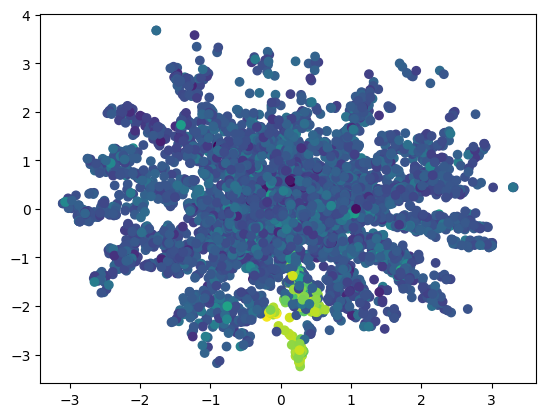

In [19]:
import matplotlib.pyplot as plt

plt.scatter(z_mu.detach().numpy()[:,0], z_mu.detach().numpy()[:,1], c = norm_re)
#plt.scatter(z_mu.detach().numpy()[:,1], z_mu.detach().numpy()[:,2], c = norm_re)

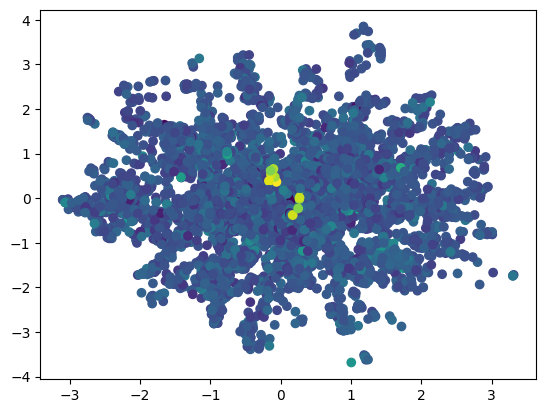

In [20]:
plt.scatter(z_mu.detach().numpy()[:,0], z_mu.detach().numpy()[:,2], c = norm_re)


In [22]:
array = np.load('vqvae_seqs_2.npz')

In [23]:
decoded_active_seqs = array['arr_0']

In [24]:
decoded_active_seqs

array([['N', 'F', 'P', 'Y', 'R', 'A', 'K', 'A', 'L', 'Y', 'S', 'Y', 'T',
        'A', 'D', 'D', 'P', 'N', 'E', 'I', 'S', 'F', 'E', 'K', 'G', 'E',
        'I', 'L', 'E', 'V', 'L', 'D', 'K', 'S', 'G', 'K', 'W', 'W', 'Q',
        'A', 'R', 'K', 'D', 'G', 'E', 'T', 'G', 'I', 'A', 'P', 'S', 'N',
        'Y', 'L', 'Q', 'L', 'L', '-', '-'],
       ['S', 'Y', 'A', 'Y', 'R', 'A', 'K', 'A', 'L', 'Y', 'A', 'Y', 'T',
        'A', 'D', 'D', 'P', 'N', 'E', 'I', 'S', 'F', 'A', 'K', 'G', 'E',
        'I', 'L', 'D', 'I', 'L', 'D', 'K', 'Q', 'G', 'K', 'W', 'W', 'Q',
        'A', 'R', 'K', 'D', 'G', 'T', 'V', 'G', 'I', 'A', 'P', 'S', 'N',
        'Y', 'L', 'Q', 'I', 'I', '-', '-'],
       ['P', 'P', 'L', 'G', 'V', 'A', 'K', 'A', 'L', 'Y', 'D', 'Y', 'E',
        'A', 'Q', 'T', 'E', 'D', 'E', 'L', 'S', 'F', 'K', 'E', 'G', 'D',
        'L', 'L', 'Y', 'V', 'L', 'D', 'K', 'S', 'D', 'D', 'W', 'W', 'K',
        'V', 'R', 'S', 'D', 'G', 'K', 'V', 'G', 'L', 'V', 'P', 'A', 'N',
        'Y', 'V', 'E', 'E', 'I', 'E'

len(val_proteins)

In [25]:
decoded_active_proteins = ProteinDataset(seq_data=decoded_active_seqs, phenotype_data=None)
decoded_active_loader = torch.utils.data.DataLoader(dataset=decoded_active_proteins, batch_size = len(decoded_active_proteins), shuffle = False)

for batch in decoded_active_loader:
    decoded_active_X, decoded_active_Y = batch
    decoded_active_X_seqs = decoded_active_X['seq']
    decoded_active_Y_seqs = decoded_active_Y['seq']


In [26]:
decoded_z_mu, decoded_z_log_var = vae_example.encode(decoded_active_X_seqs)

In [27]:
detached_decoded_z_mu = decoded_z_mu.detach().numpy()

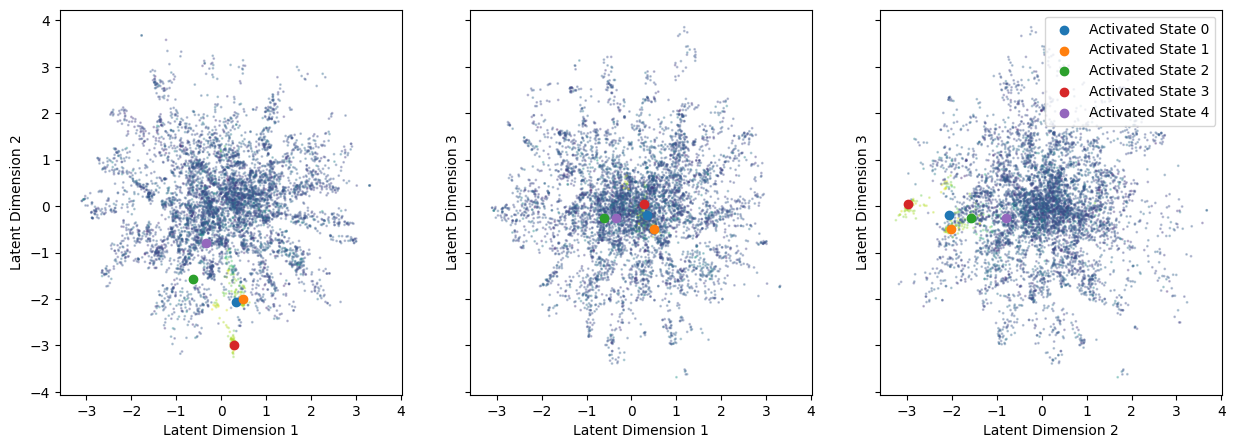

In [33]:
fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(15,5)

axs[0].set_xlabel('Latent Dimension 1')
axs[0].set_ylabel('Latent Dimension 2')
axs[1].set_xlabel('Latent Dimension 1')
axs[1].set_ylabel('Latent Dimension 3')
axs[2].set_xlabel('Latent Dimension 2')
axs[2].set_ylabel('Latent Dimension 3')


axs[0].scatter(z_mu.detach().numpy()[:,0], z_mu.detach().numpy()[:,1], c = norm_re, s=1, alpha=0.3)
axs[1].scatter(z_mu.detach().numpy()[:,0], z_mu.detach().numpy()[:,2], c = norm_re, s=1, alpha=0.3)
axs[2].scatter(z_mu.detach().numpy()[:,1], z_mu.detach().numpy()[:,2], c = norm_re, s=1, alpha=0.3)


for k in range(5):
    axs[0].scatter(detached_decoded_z_mu[k,0], detached_decoded_z_mu[k,1], label = 'Activated State {}'.format(k))
    axs[1].scatter(detached_decoded_z_mu[k,0], detached_decoded_z_mu[k,2], label = 'Activated State {}'.format(k))
    axs[2].scatter(detached_decoded_z_mu[k,1], detached_decoded_z_mu[k,2], label = 'Activated State {}'.format(k))

plt.legend()



In [34]:
results = np.load('vq_embeddings.npz')

In [35]:
vq_seqs = results['arr_0']
indices = results['arr_1']


In [36]:
vq_proteins = ProteinDataset(seq_data = vq_seqs)
vq_loader = torch.utils.data.DataLoader(dataset= vq_proteins, batch_size = len(vq_proteins), shuffle = False)
for batch in vq_loader:
    break

X, Y = batch
X_seq = X['seq']
Y_seq = Y['seq']

In [ ]:
fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(15,5)

axs[0].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,0], vq_z_mu.detach().numpy()[norm_re>0.7,1], c = indices[norm_re>0.7],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,0], vq_z_mu.detach().numpy()[norm_re>0.7,2], c = indices[norm_re>0.7],  alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,1], vq_z_mu.detach().numpy()[norm_re>0.7,2], c = indices[norm_re>0.7],  alpha=0.3)

In [ ]:
phyla_1 = phyla[phyla==1]

phyla_2 = phyla[

In [51]:
phyla_number = np.asarray([1 if num == 'Ascomycota' else 0 for num in phyla])

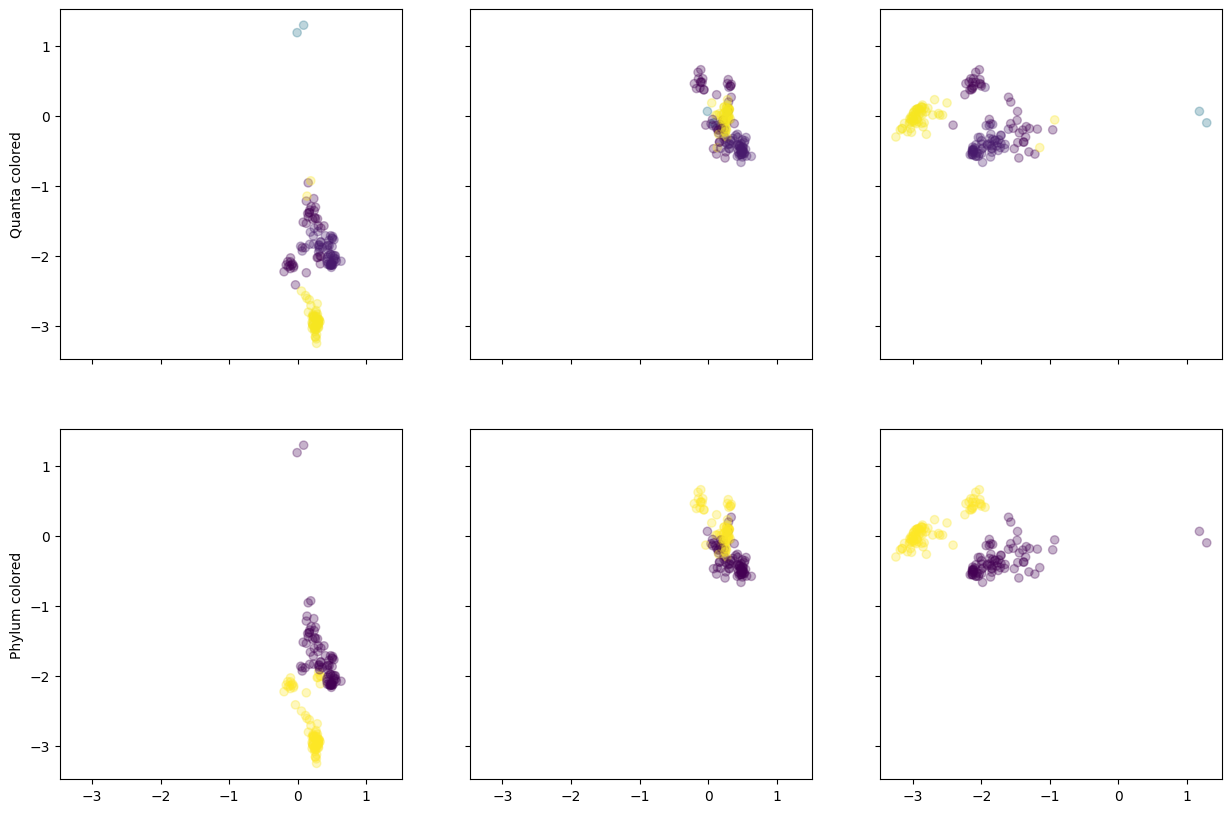

In [53]:
fig, axs = plt.subplots(2,3, sharex=True, sharey=True)
fig.set_size_inches(15,10)
axs[0,0].set_ylabel('Quanta colored')
axs[0,0].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,0], vq_z_mu.detach().numpy()[norm_re>0.7,1], c = indices[norm_re>0.7],  alpha=0.3)
axs[0,1].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,0], vq_z_mu.detach().numpy()[norm_re>0.7,2], c = indices[norm_re>0.7],  alpha=0.3)
axs[0,2].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,1], vq_z_mu.detach().numpy()[norm_re>0.7,2], c = indices[norm_re>0.7],  alpha=0.3)

axs[1,0].set_ylabel('Phylum colored')
axs[1,0].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,0], vq_z_mu.detach().numpy()[norm_re>0.7,1], c = phyla_number[norm_re>0.7],  alpha=0.3)
axs[1,1].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,0], vq_z_mu.detach().numpy()[norm_re>0.7,2], c = phyla_number[norm_re>0.7],  alpha=0.3)
axs[1,2].scatter(vq_z_mu.detach().numpy()[norm_re>0.7,1], vq_z_mu.detach().numpy()[norm_re>0.7,2], c = phyla_number[norm_re>0.7],  alpha=0.3)

In [37]:
vq_z_mu, vq_z_log_var = vae_example.encode(X_seq)

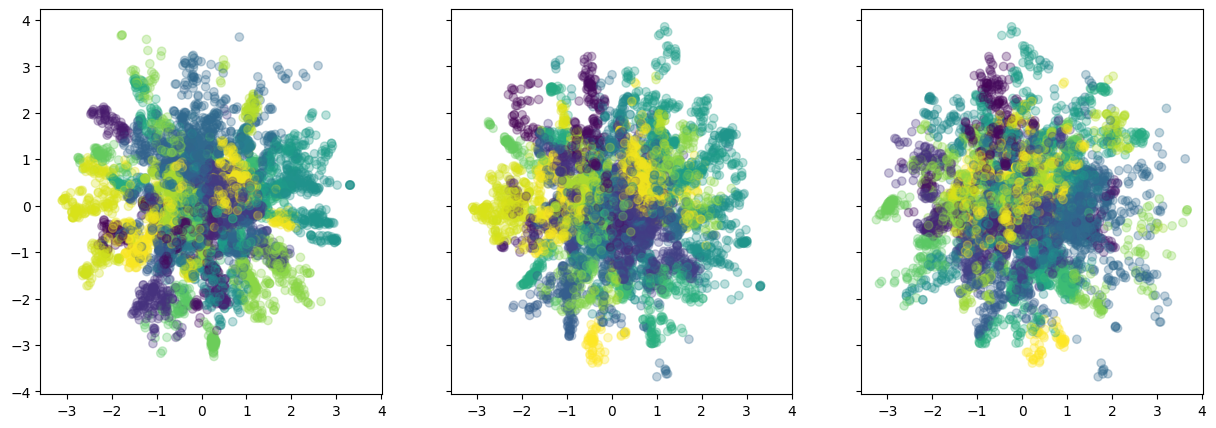

In [38]:
fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(15,5)

axs[0].scatter(vq_z_mu.detach().numpy()[:,0], vq_z_mu.detach().numpy()[:,1], c = indices,  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[:,0], vq_z_mu.detach().numpy()[:,2], c = indices,  alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[:,1], vq_z_mu.detach().numpy()[:,2], c = indices,  alpha=0.3)

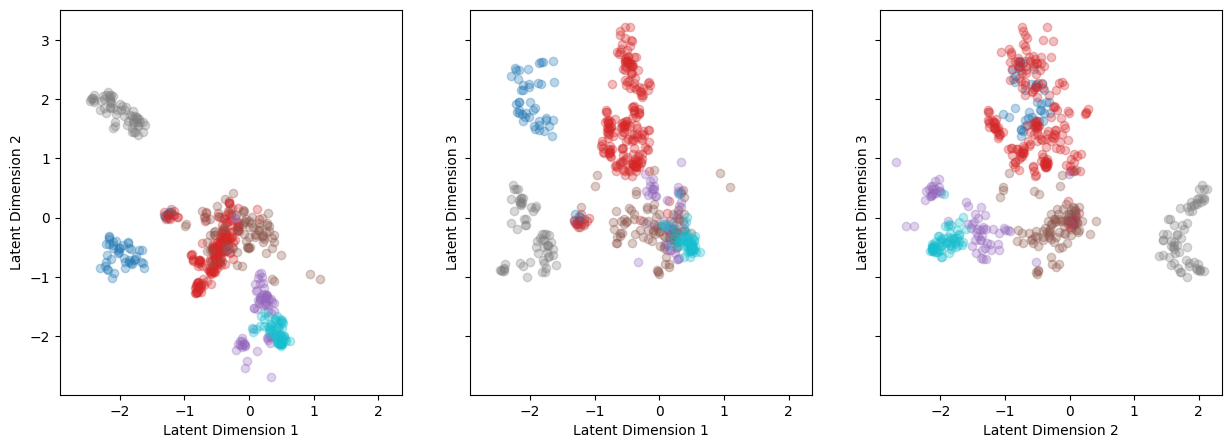

In [40]:
index_to_check = 0

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(15,5)

axs[0].set_xlabel('Latent Dimension 1')
axs[0].set_ylabel('Latent Dimension 2')
axs[1].set_xlabel('Latent Dimension 1')
axs[1].set_ylabel('Latent Dimension 3')
axs[2].set_xlabel('Latent Dimension 2')
axs[2].set_ylabel('Latent Dimension 3')

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 1

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 2

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 3

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 4

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 5

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 6

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 7

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 8

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

index_to_check = 9

axs[0].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,1],  alpha=0.3)
axs[1].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,0], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)
axs[2].scatter(vq_z_mu.detach().numpy()[indices==index_to_check,1], vq_z_mu.detach().numpy()[indices==index_to_check,2],   alpha=0.3)

In [688]:
detached_vq_z_mu = vq_z_mu.detach().numpy()

In [692]:
np.linalg.norm(detached_vq_z_mu, axis=1)

array([1.8479065, 1.4572799, 1.1041322, ..., 2.2849789, 2.627491 ,
       1.5230663], dtype=float32)

In [696]:
num_seqs = []
dist_from_origin = []

for index in indices:
    dist_from_origin.append(np.mean(np.linalg.norm(detached_vq_z_mu[indices==index], axis=1)))
    num_seqs.append(detached_vq_z_mu[indices==index].shape[0])
    

Text(0, 0.5, 'Radial Distance Average')

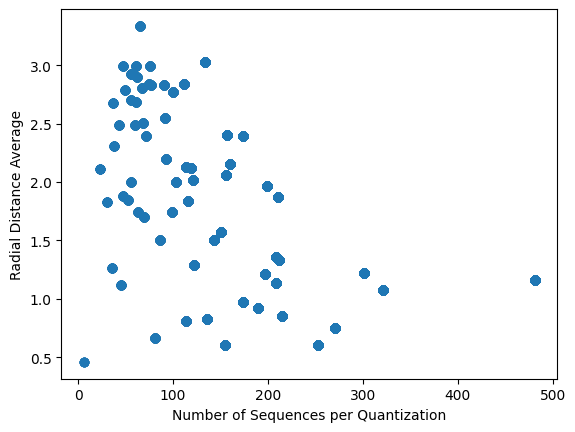

In [698]:
plt.scatter(num_seqs, dist_from_origin)
plt.xlabel('Number of Sequences per Quantization')
plt.ylabel('Radial Distance Average')
